<a id='top'></a>

# CSCI3022 S22



# Homework 6: Hypothesis Testing

## Due Monday, April 11 at 11:59 pm to Canvas and Gradescope
***

**Name**: Matthew Su


***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline


---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---


[Back to top](#top)

<a id='p1'></a>

## (10 pts) Problem 1 (Practice): How did we do?
***

A  short prompts on applying Hypothesis Tests to data sets:

### NFL Overtime

On Homework 3 we tested the idea that the first team might be favored in an NFL overtime by estimating the proportions that the first and second teams received the ball.  Suppose we had approached this problem as a hypothesis test, wherein we we would propose a change to a new format if the data suggests a bias towards either team with a signifance of 10%.    Use the large-sample approximation to the Binomial where appropriate.


**1A)** State the null and alternative hypothesis for this experiment, both in "$H_0$" notation as stated as plain English sentences.

"$H_0 : p=\frac{1}{2}$, as it is to be expected that teams would split possessions evenly as to give each team a shot. In a 10 minute overtime, it should be expected that each team AT LEAST should recieve the ball once. However, it is to be believed that $H_1: p > \frac{1}{2}$ in favor of the team that recieves the ball first, as it was seen before that the first team often was able to recieve and score the ball without the other team even getting a posession. That would imply that the $H_1$ for the losing team is < $\frac{1}{2}$."

**1B)** For *your* results from the "NFL overtime" problem of HW 3 Problem 3, what is the corresponding Z-statistic $Z_{stat}$, p-value, and critical value $z_\alpha$?  What decision would you make?

Note: If you didn't actually do this problem, you may use the solution simulation values of 542 "team 1 wins" and 321 "team 2 wins" in 1000 simulations. But use your own exact values if possible!

In [3]:
# Win prob for team 1 used
# based on nb17 zscore calc, sig replaced with 10 (not sure where sig came from in this instance, asssumed it was converted alpha)
# z = (xbar-mu0)/(sig/np.sqrt(sample_size))

import math

mean = 0.649
zcrit=stats.norm.ppf(1-0.05)
# zstat = (mean-0.5)/(np.sqrt(10/500))

zstat = (mean-0.5)/np.sqrt((0.5*0.5)/1000)

#                   (p1-p2)
#   z = ------------------------------
#            sqrt(p2(1-p2)(1/1000))

#H1 > H0

pv1 = 1 - stats.norm.cdf(zstat)

print("zstat, zcrit, and pvalue for team that won coin toss: ", zstat,zcrit,pv1)

# Win prob for team 2 used

mean2 = 0.202 # real value x hat
zstat2 = (mean2-0.5)/math.sqrt((0.5*0.5)/1000)
# zstat2 = (mean2-0.5)/(np.sqrt(10/500))

# H1 < H0

pv2 = stats.norm.cdf(zstat2)

print("Values for team that lost coin toss:                ", zstat2,zcrit,pv2)

zstat, zcrit, and pvalue for team that won coin toss:  9.423587427301772 1.6448536269514722 0.0
Values for team that lost coin toss:                 -18.84717485460354 1.6448536269514722 1.5497988381861175e-79


We can throw away the null hypothesis of the team that wins the coin toss since its p score is zero which is less than the alpha of 0.1. 
We can throw away the null hypothesis of the team that loses the coin toss since its p score is less than the alpha of 0.1. 

**1C)** Since the overtime change in 2020, actual NFL game data reveals that the team receiving the ball first has won 86 times and tied 10 times out of 164 total overtime games.  What are the corresponding Z-statistic $Z_{stat}$, p-value, and critical value $z_\alpha$?  What decision would you make with this data?

In [4]:
mean = 86/164
zcrit=stats.norm.ppf(1-0.05)
# zstat = (mean-0.5)/(np.sqrt(10/500))

zstat = (mean-0.5)/np.sqrt((0.5*0.5)/1000)

#                   (p1-p2)
#   z = ------------------------------
#            sqrt(p2(1-p2)(1/1000))

#H1 > H0

pv1 = 1 - stats.norm.cdf(zstat)

print("zstat, zcrit, and pvalue for team that won coin toss: ", zstat,zcrit,pv1)

# Win prob for team 2 used

mean2 = 68/164 # real value x hat
zstat2 = (mean2-0.5)/math.sqrt((0.5*0.5)/1000)
# zstat2 = (mean2-0.5)/(np.sqrt(10/500))

# H1 < H0

pv2 = stats.norm.cdf(zstat2)

print("Values for team that lost coin toss:                ", zstat2,zcrit,pv2)

zstat, zcrit, and pvalue for team that won coin toss:  1.5425744683748206 1.6448536269514722 0.06146702837025908
Values for team that lost coin toss:                 -5.399010639311869 1.6448536269514722 3.3504700283429875e-08


In this case we can keep the null hypothesis for team 1 but continue to reject the null hypothesis for team 2, as the z value is less than -zcrit value.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2- The power!

Dale and Brennan were gifted a Playstation, and have replaced playing sports and card games with endless games of FIFA against one another.  Dale is happy to just play and have fun, but Brennan is very interested in demonstrating his superiority over his brother, and wants to *prove* that he's actually better at the game.

Suppose they play 100 games and record the results.  Let $B$ be the number of wins for Brennan in 100 games of FIFA, where we perhaps denote the *true* probability of Brennan winning any given game by $p$. 

Similar to the Belgian Euro example, we hope to *test* whether this set of games is biased **towards Brennan**.

#### Part a)

State the null and alternative hypotheses.


$H_0: p = 0.5$ <br>
$H_1: p > 0.5$


#### Part b)
Suppose we define the rejection region to be $B > 59$. 

Calculate the rate of type I error of this test. (For this, and all remaining parts, calculate probabilities **exactly**, i.e., without using a normal approximation)


In [73]:
# <=58 wins, 100 games, null p
1-stats.binom.cdf(58,100,0.5)

0.04431304005703374


#### Part c)

Simulate a single dataset (or appropriate summary of a dataset) under the null hypothesis, and apply your test from part (a). State your conclusion. Is your conclusion in error? If so, which type?

Repeat this process 1000 times in total and verify that the error rate appears consistent with your calculations in part b).


In [78]:
results = []
sub58 = 0
for i in range(1000):
    counter = 0
    for j in range(100):
        b = np.random.choice([0,1],1,[0.5,0.5])

        if (b == 0):
            counter += 1

    results.append(counter)
    if counter <=58:
        sub58+=1


print("Pretty close to part b: ", 1-(sub58/1000), " vs ", 1- stats.binom.cdf(58,100,0.5))
        

Pretty close to part b:  0.04700000000000004  vs  0.04431304005703374



#### Part d)
Consider that the *reality* of Brenann being favored to win could take on any possible different value of actual bias $p>.5$, and how well we make our decisions depends on *how* favored Brennan actually is!  Construct a grid/list of some possible values $p$ for the alternative hypothesis $p_{alt}=[0.51,0.52,0.53, \dots .99, 1.00]$.

For each value of $p$ in this list, calculate the **power** of the test from part $a$.  Return exact values rather than simulated/estimated probabilities.

(Recall: statistical **power** is the probability of rejecting the null hypothesis while the alternative hypothesis is true, so it's the probability of corrected *detecting* that Brennan is the better player). 

Plot the power ($y$-axis) against $p$ ($x$-axis) over each of these scenarios. 

Interpret/comment on this plot. Specifically, as $p$ gets *further* from the specified $p=p_0$ under the null hypothesis, what happens to the power?

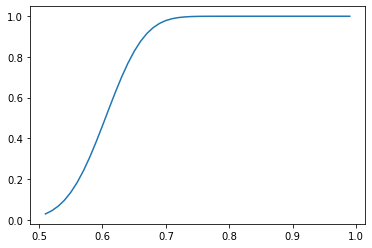

In [6]:
results = []
pplot = []
p = 0.51
for i in range(50):

    results.append(1-stats.binom.cdf(60,100,p))
    pplot.append(p)
    p += 0.01
    
plt.plot(pplot,results)

As $p$ gets farther and farther away from $p_0$, the power exponentially increases until it levels out around 0.7, where rejecting the null hypothesis is almost gurenteed

#### Part e)

(e) Suppose we allowed other rejection regions than $B>59$.  Use the ideas in part (d) to answer the following: how many plays $m$ of a game are necessary to achieve both $\alpha=0.05$ **and** $\beta=0.05$ for the hypothesis in part (a).  You may focus on the "hardest to detect" value of $p_{alt}$ from the list in part d.

In other words: suppose that **either** Brennan is perfectly matches with Dale **or** that Brennan wins exactly 51% of the time.  How many games do they have to play to be able to correctly diagnose both cases 95% of the time?

*Hint*: You can brute force this to find the first value of $n$ that satisfies the requirement.  Intuition: to be able to tell a 50% "coin" and a 51% coin apart might take quite a few flips...

In [9]:
m = 1
while stats.binom.sf(50,m,0.5) < 0.05 and stats.binom.sf(51,m,0.5) < 0.05:
    m += 1

print (m)

86



## Problem 3 (Hypothesis Simulation; 20 points)
***
Suppose our goal is to outperform a very naive self-driving vehicle. This vehicle is so simple that its motion is entirely random!  The goal is for both our self-driving "car" and the comparison "random" car is to make it from the starting location in the bottom left in Cartesian coordiantes (0,0) and make it to the end goal at (5,2).

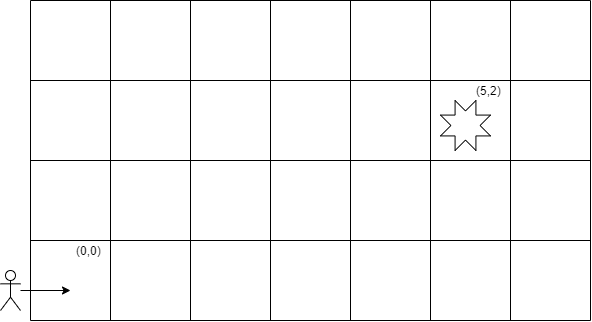

Movement for the "random" car occurs under the following rules:
- Each time step, the car will attempt to choose a cardinal direction to move out of (N, S, W, E)
- It will choose to move the **same** direction as its prior motion exactly 50% of the time
- It will choose to turn left or right exactly 25% of the time, each.  (So if it was going North, it could stay North or turn to East or West.)
- If a movement chosen would result in it leaving the 7x4 region shown, it will choose again from the same options and probabilities until a valid movement is chosen.

The car is done moving as soon as it enters the square at (5,2).  It starts at (0,0), and moves as though its prior move was to the East.

**Part A**: Needless to say, this car isn't very smart.  Simulate 10,000 "journies" of this randomly moving car, saving how many movements were required to reach (5,2). You may use any syntax/API you want, but one option is loosely outlined below.

In [83]:
#mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=E.  Makes for a nice way to estimate probs.
def journey():
    
    n = 0
    s = 0
    # Prior move = east
    e = 1
    w = 0
    
    # Counter
    movements = 0
    
    # coordinates
    x = 0
    y = 0

    #mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=W.  Makes for a nice way to estimate probs.
    
    while (x != 5 or y != 2):

            # East Consecutive
            # mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=W.  Makes for a nice way to estimate probs.
            if(e==1):
                move = np.random.choice([0,1,2,3], 1, [0.25,0.5,0.25,0])
                # East
                if (move == 1):
                    # if next move within bounds
                    if (x+1 <= 7):
                        x += 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # North
                elif(move == 0):
                    # if next move within bounds
                    if (y+1 <= 4):
                        y += 1
                        #reset e consecutive to 0
                        e = 0
                        #set n consecutive to 1
                        n = 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # South
                elif(move == 2):
                    # if next move within bounds
                    if (y-1 >= 0):
                        y -= 1
                        e = 0
                        s = 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # West
                elif(move == 3):
                    # if next move within bounds
                    if (x-1 >= 0):
                        x -= 1
                        e = 0
                        w = 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue

            # North Consecutive
            # mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=E.  Makes for a nice way to estimate probs.

            elif(n==1):
                m = np.random.choice([0,1,2,3], 1, [0.5,0.25,0,0.25])
                # East
                if (m == 1):
                    # if next move within bounds
                    if (x+1 <= 7):
                        x += 1
                        e = 1
                        n = 0
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # North
                elif(m == 0):
                    # if next move within bounds
                    if (y+1 <= 4):
                        y += 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # South
                elif(m == 2):
                    # if next move within bounds
                    if (y-1 >= 0):
                        y -= 1
                        n = 0
                        s = 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # West
                elif(m == 3):
                    # if next move within bounds
                    if (x-1 >= 0):
                        x -= 1
                        n = 0
                        w = 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
            
            # South Consecutive
            # mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=W.  Makes for a nice way to estimate probs.

            elif(s==1):
                m = np.random.choice([0,1,2,3], 1, [0,0.25,0.5,0.25])
                # East
                if (m == 1):
                    # if next move within bounds
                    if (x+1 <= 7):
                        x += 1
                        e = 1
                        s = 0
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # North
                elif(m == 0):
                    # if next move within bounds
                    if (y+1 <= 4):
                        y += 1
                        n = 1
                        s = 0
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # South
                elif(m == 2):
                    # if next move within bounds
                    if (y-1 >= 0):
                        y -= 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # West
                elif(m == 3):
                    # if next move within bounds
                    if (x-1 >= 0):
                        x -= 1
                        s = 0
                        w = 1
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue

            # South Consecutive
            # mapping direction indices as clockwise; 0=N, 1=E, 2=S, 3=W.  Makes for a nice way to estimate probs.

            elif(w==1):
                m = np.random.choice([0,1,2,3], 1, [0.25,0,0.25,0.5])
                # East
                if (m == 1):
                    # if next move within bounds
                    if (x+1 <= 7):
                        x += 1
                        e = 1
                        w = 0
                        movements += 1
                        
                    #else go again, bit values are preserved
                    else:
                        continue
                # North
                elif(m == 0):
                    # if next move within bounds
                    if (y+1 <= 4):
                        y += 1
                        n = 1
                        w = 0
                        movements += 1
                    #else go again, bit values are preserved
                    else:
                        continue
                # South
                elif(m == 2):
                    # if next move within bounds
                    if (y-1 >= 0):
                        y -= 1
                        w = 0
                        s = 1
                        movements += 1
                    #else go again, bit values are preserved
                    else:
                        continue
                # West
                elif(m == 3):
                    # if next move within bounds
                    if (x-1 >= 0):
                        x -= 1
                        movements += 1
                    #else go again, bit values are preserved
                    else:
                        continue

        
    # print(movements)
    # print(x,y)
    return movements
            


In [84]:
# results=np.array([journey((0,0), 1, [5, 2]) for _ in range(10**4)])

# for i in range (5):
#     m = np.random.choice([0,1,2,3], 1, [0.25,0,0.25,0.5])

#     print(m)

# journey()

results = []
x = []
for i in range(10000):
    move = journey()
    results.append(move)
    x.append(i)



**Part B**: Create a density histogram of the number of movements observed until the naive car reaches (5,2).  Label axes, and include a title.  Does this appear to be normally distributed? Why would we care?
    

78.2994 595


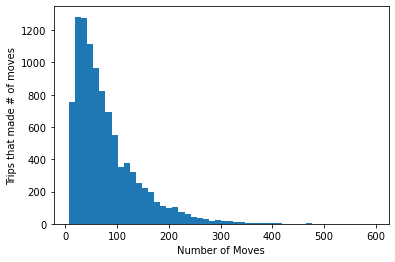

In [85]:
plt.hist(results, bins = 50)
plt.xlabel("Number of Moves")
plt.ylabel("Trips that made # of moves")
print (np.mean(results), np.max(results))

It is definitly not distributed around the mean (~78), and we should be pretty concerned. To be honest, a car taking 78 moves to move 5 spaces east and 2 spaces up is pretty terrible, but the max number of movements (655) is untenable at best. It seems that this car is a poor example of an intelligent car. 

**Part C**: You and your team design a new car, and thankfully it uses a **different** algorithm to determine how and where to move.  Unfortunately, you don't get a sample size of 10,000 samples from your car, since it actually drives on a small track.  You drive it on a similar grid to the above 10 times, and find that over those 10 times your car averaged 16 moves, and had a median of 17 moves.  Is this demonstrably better than the car you simulated in parts **A** and **B**?  Answer with the following prompts:

**C1**: What is your estimated probability that a single trip of the "random" car takes 16 moves or less?

**C2**: What would you estimate the probability to be that an *average* number of movements over 10 trips is 16 or less?
     
**C3**: Suppose we were to create a 1-tailed hypothesis test of the form "I reject the null hypothesis that my car of the same quality as the random car if a set of 10 trials has an average number of movements less than or equal to $c$."  What would you choose for $c$ if you wanted a probability of Type I error of .04 or less?

**C4**: Would your results in parts **C1**-**C3** change it all if we compared the *medians* instead of the *means* of your car versus the "random" car?

**C5**: What can you safely (with statistical rigor!) tell people about your new car?

*Hint*: `np.reshape` is a nice way to group your original simulations into sets-of-10, if that interests you

In [101]:
# Generate an np.array using journey again so that it can be reshaped into 1000 rows of 10 values each.

r = np.empty(shape=(1000,10))
x = []
for i in range(1000):
    for j in range(10):
        r[i][j] = journey()


    
    

In [114]:
less = 0
for x in range(10000):
    if results[x] <= 16:
        less += 1

print ("C1 prob: ", (less/10000))

byten = []
for i in range(1000):
    counter = 0
    for j in range(10):
        if r[i][j] <= 16:
            counter += 1
    byten.append(counter/10)

# Compare every group of 10 within 1000 (10000 tries total)
# Increment a counter when <= 16
# Counter/10 (mean) is stored in byten
# Mean of means calculated by finding mean of byten array, represents average prob per 10

def do (n):
    bt = []
    for i in range(n):
        counter = 0
        for j in range(10):
            if r[i][j] <= 16:
                counter += 1
        bt.append(counter/10) 
    return bt

print("C2 prob: ", np.mean(byten))

count = 0
tf = 0
m = 1

while tf == 0:
    zcrit=stats.norm.ppf(1-0.04)
    # zstat = (mean-0.5)/(np.sqrt(10/500))
    ay = do(m)
    zstat = (np.mean(ay)-(less/10000))/np.sqrt(((less/10000)*(less/10000))/1000)
    p = stats.norm.cdf(zstat)

    if (p > zstat):
        m += 1
        continue
    else:
        tf = 1

print("C3: estimated c give or take 10 = ~",m*10)
print("C4: Yes, for sure, since our car can vary wildly between double and triple digit moves. The median ", np.median(results), " is noticably smaller than our mean, ", np.mean(results)) 
print("    We could use a smaller c value to reach that 0.04 type 1 error.")
print("C5: Honest to god, the new car is so much better than the old one. Our average movements required to reach a destination went from ~78 down to an average of 16, almost 5 times as efficent!")
print("    It's like going from the tesla roadster to the tesla model s in terms of improvement. Buy the new car and send the old car into space or something idk I don't own 9.2% of twitter")
    



# for i in range (10):
#     if i % 10 != 0:
#         continue
#     else:
#         for j in range(10):

        








C1 prob:  0.0575
C2 prob:  0.06520000000000001
C3: estimated c give or take 10 = ~ 710
C4: Yes, for sure, since our car can vary wildly between double and triple digit moves. The median  61.0  is noticably smaller than our mean,  78.1241
    We could use a smaller c value to reach that 0.04 type 1 error.
C5: Honest to god, the new car is so much better than the old one. Our average movements required to reach a destination went from ~78 down to an average of 16, almost 5 times as efficent!
    It's like going from the tesla roadster to the tesla model s in terms of improvement. Buy the new car and send the old car into space or something idk I don't own 9.2% of twitter
